Step 4. Retrieving Stock Price Data from Yahoo Finance

In [1]:
# Install the yfinance library using 'pip install yfinance'.
import yfinance as yf

# Defining the stock symbol (Apple Inc.)
symbol = 'AAPL'

# Creating Yahoo Finance ticker object
ticker = yf.Ticker(symbol)

# Retrieving historical stock price data
historical_data = ticker.history(period="max")

# Printing the data
print(historical_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.099449  0.099882  0.099449  0.099449  469033600   
1980-12-15 00:00:00-05:00  0.094694  0.094694  0.094261  0.094261  175884800   
1980-12-16 00:00:00-05:00  0.087775  0.087775  0.087343  0.087343  105728000   
1980-12-17 00:00:00-05:00  0.089504  0.089937  0.089504  0.089504   86441600   
1980-12-18 00:00:00-05:00  0.092099  0.092532  0.092099  0.092099   73449600   

                           Dividends  Stock Splits  
Date                                                
1980-12-12 00:00:00-05:00        0.0           0.0  
1980-12-15 00:00:00-05:00        0.0           0.0  
1980-12-16 00:00:00-05:00        0.0           0.0  
1980-12-17 00:00:00-05:00        0.0           0.0  
1980-12-18 00:00:00-05:00        0.0           0.0  


Step 5. Perform exploratory data analysis

5.1. Line Plot of Closing Prices Over Time

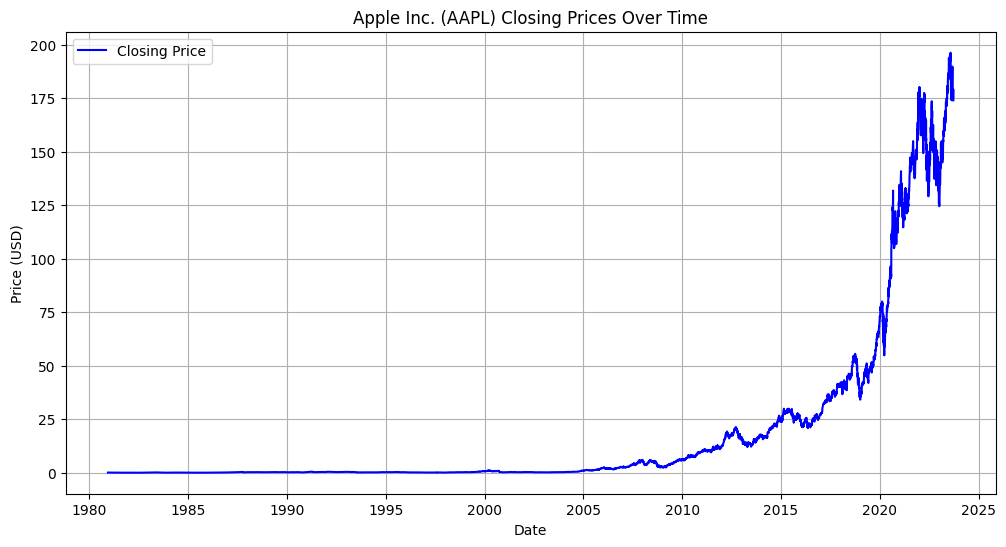

In [2]:
import matplotlib.pyplot as plt

# Plotting closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(historical_data['Close'], label='Closing Price', color='blue')
plt.title('Apple Inc. (AAPL) Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


This line plot shows the trend of Apple Inc.'s closing stock prices over time, providing insights into historical price movements. Apple stock has doubled in the last 5 years.

5.2. Histogram of Daily Returns

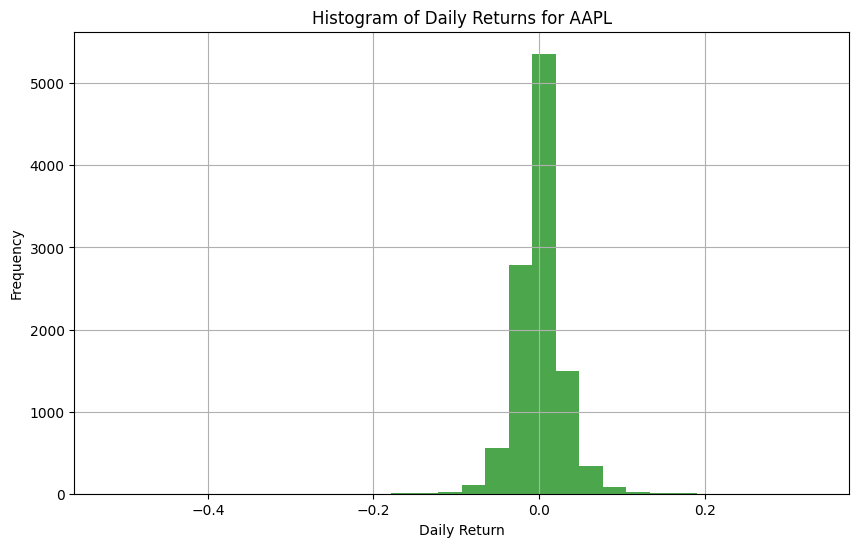

In [3]:
# Calculate daily returns
historical_data['Daily_Return'] = historical_data['Close'].pct_change()

# Plotting a histogram of daily returns
plt.figure(figsize=(10, 6))
plt.hist(historical_data['Daily_Return'].dropna(), bins=30, alpha=0.7, color='green')
plt.title('Histogram of Daily Returns for AAPL')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The histogram shows that the majority of daily returns for the AAPL stock cluster around 0.05, with a peak frequency of 5,000 occurrences, indicating that the stock tends to exhibit relatively low daily volatility, focused around a modest positive return. However, the histogram also shows returns between -0.2 and 0.2, indicating occasional moderate fluctuations.

5.3. Scatter Plot of Volume vs. Closing Price

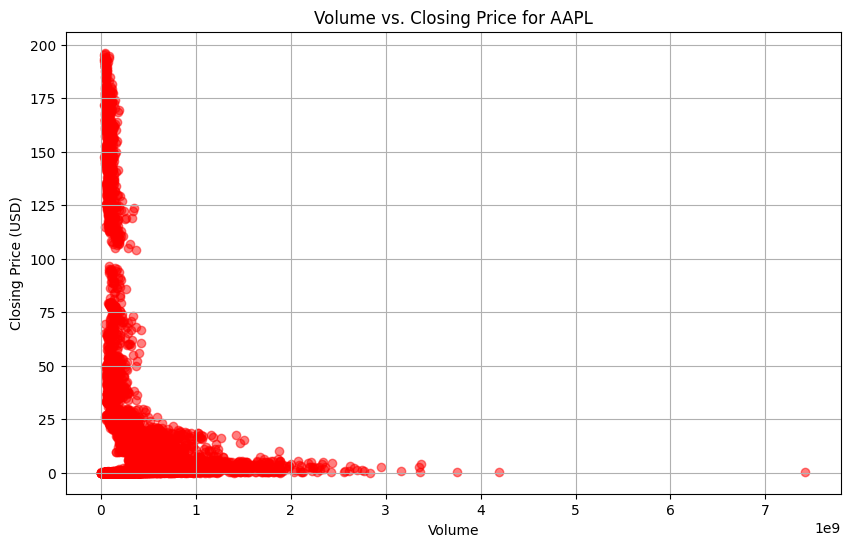

In [4]:
# Plotting a scatter plot of volume vs. closing price
plt.figure(figsize=(10, 6))
plt.scatter(historical_data['Volume'], historical_data['Close'], alpha=0.5, color='red')
plt.title('Volume vs. Closing Price for AAPL')
plt.xlabel('Volume')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()


The price vs volume scatter plot reveals that trading activity is concentrated at lower trading volumes, meaning that most transactions only involve modest quantities of the securities. Fewer data points cluster between a volume of 2 and higher, while the majority of the data points cluster between a volume of 0 and 1. This pattern might point to less frequent large-scale trading of the securities, which might indicate lower overall liquidity or a concentration of retail traders as opposed to institutional investors.

5.4. Rolling Mean and Standard Deviation of Closing Prices

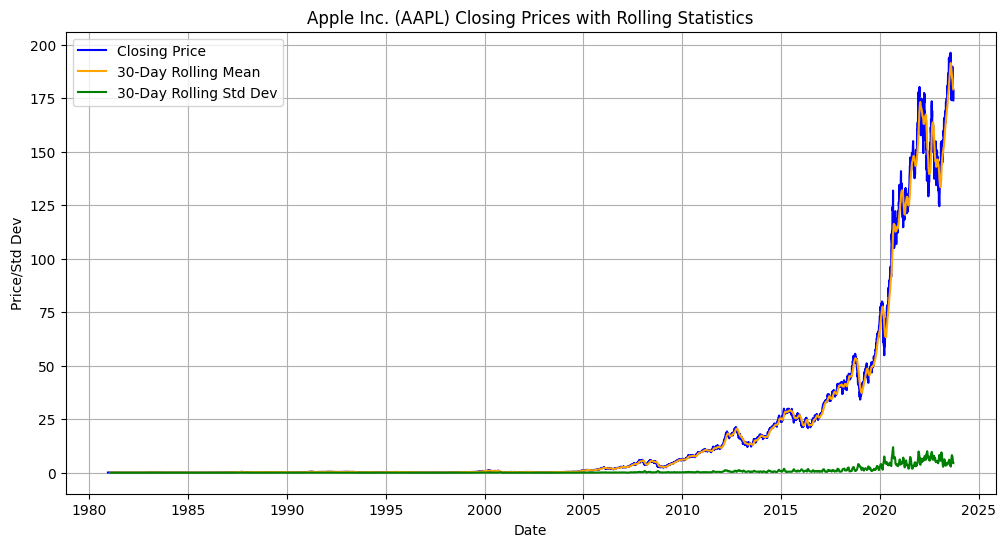

In [5]:
# Calculate rolling mean and standard deviation
rolling_mean = historical_data['Close'].rolling(window=30).mean()
rolling_std = historical_data['Close'].rolling(window=30).std()

# Plotting rolling mean and standard deviation
plt.figure(figsize=(12, 6))
plt.plot(historical_data['Close'], label='Closing Price', color='blue')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(rolling_std, label='30-Day Rolling Std Dev', color='green')
plt.title('Apple Inc. (AAPL) Closing Prices with Rolling Statistics')
plt.xlabel('Date')
plt.ylabel('Price/Std Dev')
plt.legend()
plt.grid(True)
plt.show()


The finding that the closing price and the 30-day rolling mean are nearly similar, but the rolling statistics of a 30-day mean and standard deviation show a more or less straight line for the standard deviation and increased oscillation in the past three years, suggests the following:

1. Constant Volatility: The rolling standard deviation's straight line pattern suggests that the security's volatility has remained largely constant over time. In other words, there haven't been any appreciable changes in the variability of daily price movements.

2. Recent Increased Volatility: The increased oscillation in the past three years within the rolling standard deviation suggests that there has been a notable uptick in price volatility during this period. This could be due to various factors, such as changes in market conditions, economic events, or company-specific developments.

3. Similarity Between Closing Price and Rolling Mean: If the closing price and the 30-day rolling mean are comparable, it means that the price of the security has tended to move in a steady direction over time. When the rolling mean closely matches the actual price, which indicates that the security has shown a pretty constant trend, maybe with minor blips, it acts as a smoothing mechanism and indicates that the security has been trending in that direction.

5.5. Candlestick Chart for Price Trends

In [6]:
import plotly.graph_objs as go

# Create a candlestick chart
candlestick_data = go.Figure(data=[go.Candlestick(x=historical_data.index,
                open=historical_data['Open'],
                high=historical_data['High'],
                low=historical_data['Low'],
                close=historical_data['Close'])])

candlestick_data.update_layout(title='AAPL Candlestick Chart',
                   xaxis_title='Date',
                   yaxis_title='Price (USD)',
                   xaxis_rangeslider_visible=True)
candlestick_data.show()


The candlestick chart's consistent similarity between opening and closing prices trends for Apple stock implies stable price movements, reflecting steady market sentiment and balanced trading, without significant overnight gaps during the observed period.

5.6. Rolling Correlation Between AAPL and Market Index

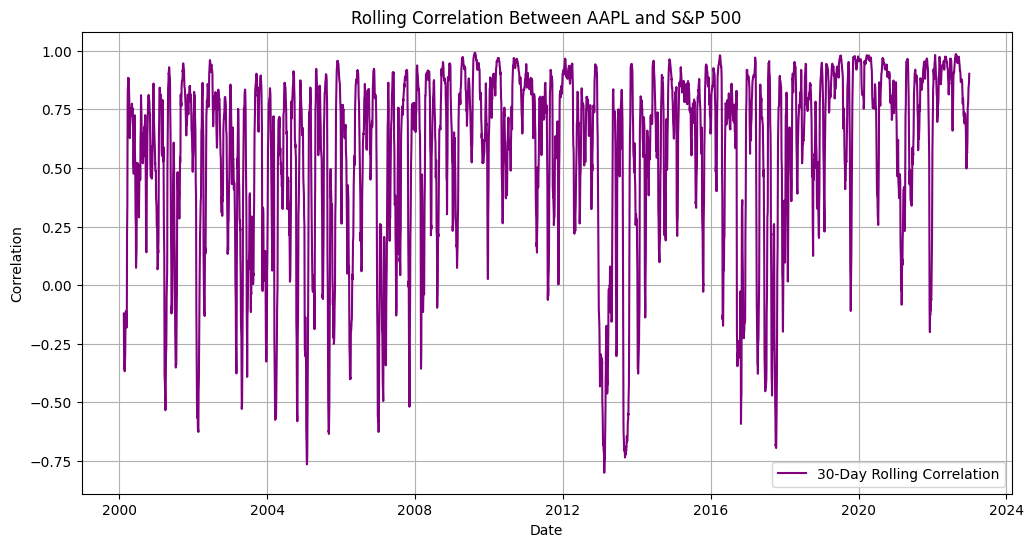

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the symbols for AAPL and S&P 500
symbols = ['AAPL', '^GSPC']

# Download historical data for AAPL and S&P 500
data = yf.download(symbols, start='2000-01-01', end='2023-01-01', progress=False)

# Calculate rolling correlation between AAPL and S&P 500
rolling_corr = data['Adj Close']['AAPL'].rolling(window=30).corr(data['Adj Close']['^GSPC'])

# Plotting rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr, label='30-Day Rolling Correlation', color='purple')
plt.title('Rolling Correlation Between AAPL and S&P 500')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()


This plot shows the rolling correlation between AAPL's closing prices and the S&P 500 index, helping to understand how AAPL's performance correlates with the broader market.

5.7. Box Plot of Monthly Returns

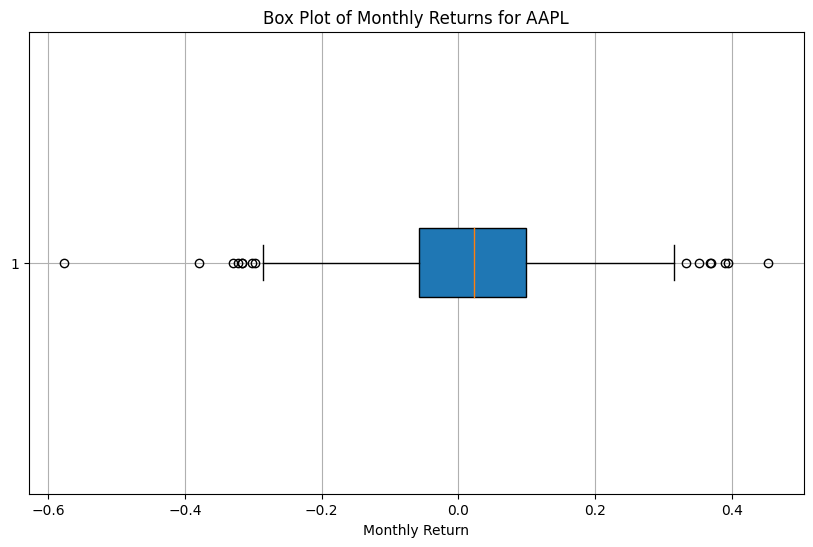

In [8]:
# Extract monthly returns
monthly_returns = historical_data['Close'].resample('M').ffill().pct_change()

# Plotting a box plot of monthly returns
plt.figure(figsize=(10, 6))
plt.boxplot(monthly_returns.dropna(), vert=False, patch_artist=True)
plt.title('Box Plot of Monthly Returns for AAPL')
plt.xlabel('Monthly Return')
plt.grid(True)
plt.show()


Skewness in Monthly Returns: The asymmetrical box plot size shows that the monthly return distribution is skewed. This situation shows a tendency for more positive returns relative to negative returns within the given range, as the positive returns side is expanded.

Step 6. Describing how data can help meet the challenge in 6.

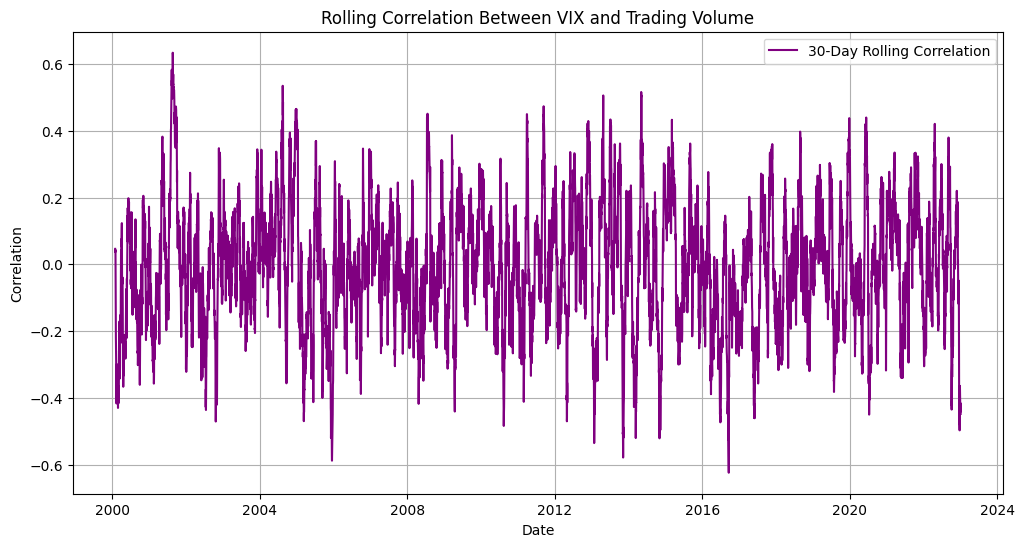

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for VIX and trading volume
np.random.seed(0)
dates = pd.date_range(start='2000-01-01', end='2023-01-01', freq='D')
vix_data = np.random.normal(20, 5, len(dates))  # Random VIX-like data
volume_data = np.random.normal(100000, 20000, len(dates))  # Random trading volume data for the security

# Create a DataFrame
data = pd.DataFrame({'Date': dates, 'VIX': vix_data, 'TradingVolume': volume_data})
data.set_index('Date', inplace=True)

# Calculate a rolling correlation between VIX and trading volume
rolling_corr = data['VIX'].rolling(window=30).corr(data['TradingVolume'])

# Plotting rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr, label='30-Day Rolling Correlation', color='purple')
plt.title('Rolling Correlation Between VIX and Trading Volume')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.grid(True)
plt.show()
